In [ ]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder,MinMaxScaler


In [ ]:
#loading the datset
train=pd.read_csv('train_genetic_disorders.csv')
test=pd.read_csv('test_genetic_disorders.csv')
data_train=train.copy()
data_test=test.copy()

In [ ]:
train

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3028,PID0xbd1,0.0,Yes,No,NaN,No,4.749252,Anne,Tam,Jarrel,...,Multiple,NaN,abnormal,1.0,0.0,1.0,1.0,1.0,Single-gene inheritance diseases,Cystic fibrosis
3029,PID0x4f7d,7.0,Yes,Yes,Yes,Yes,4.903504,Margaret,NaN,Barek,...,Singular,7.791140,inconclusive,1.0,1.0,1.0,0.0,1.0,NaN,Leber's hereditary optic neuropathy
3030,PID0x1ff6,3.0,Yes,No,NaN,Yes,4.633277,Anita,Anderson,Cassen,...,Singular,7.097891,abnormal,1.0,NaN,0.0,NaN,0.0,Single-gene inheritance diseases,Tay-Sachs
3031,PID0x3238,8.0,Yes,Yes,NaN,No,4.992744,Paula,Williford,Samuelu,...,Singular,11.496999,NaN,0.0,1.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome


In [ ]:
test

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,PID0x4175,6.0,No,Yes,No,No,4.981655,Charles,NaN,Kore,...,-99,2.0,Multiple,-99.000000,slightly abnormal,True,True,True,True,True
1,PID0x21f5,10.0,Yes,No,NaN,Yes,5.118890,Catherine,NaN,Homero,...,Yes,-99.0,Multiple,8.179584,normal,False,False,False,True,False
2,PID0x49b8,5.0,No,NaN,No,No,4.876204,James,NaN,Danield,...,No,0.0,Singular,-99.000000,slightly abnormal,False,False,True,True,False
3,PID0x2d97,13.0,No,Yes,Yes,No,4.687767,Brian,NaN,Orville,...,Yes,-99.0,Singular,6.884071,normal,True,False,True,False,True
4,PID0x58da,5.0,No,NaN,NaN,Yes,5.152362,Gary,NaN,Issiah,...,No,-99.0,Multiple,6.195178,normal,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train.dtypes

Patient Id                                           object
Patient Age                                         float64
Genes in mother's side                               object
Inherited from father                                object
Maternal gene                                        object
Paternal gene                                        object
Blood cell count (mcL)                              float64
Patient First Name                                   object
Family Name                                          object
Father's name                                        object
Mother's age                                        float64
Father's age                                        float64
Institute Name                                       object
Location of Institute                                object
Status                                               object
Respiratory Rate (breaths/min)                       object
Heart Rate (rates/min                   

In [ ]:
#No. of missing values in each row
data_train.isnull().sum()

Patient Id                                           1072
Patient Age                                          2440
Genes in mother's side                               1072
Inherited from father                                1359
Maternal gene                                        3766
Paternal gene                                        1072
Blood cell count (mcL)                               1072
Patient First Name                                   1072
Family Name                                         10312
Father's name                                        1072
Mother's age                                         6790
Father's age                                         6761
Institute Name                                       5932
Location of Institute                                1072
Status                                               1072
Respiratory Rate (breaths/min)                       3131
Heart Rate (rates/min                                3097
Test 1        

In [ ]:
data_test.isnull().sum()

Patient Id                                           173
Patient Age                                          173
Genes in mother's side                               173
Inherited from father                                717
Maternal gene                                       3829
Paternal gene                                        173
Blood cell count (mcL)                               173
Patient First Name                                   173
Family Name                                         9316
Father's name                                        173
Mother's age                                         173
Father's age                                         173
Institute Name                                      2170
Location of Institute                                173
Status                                               173
Respiratory Rate (breaths/min)                      3013
Heart Rate (rates/min                               3014
Test 1                         

In [ ]:
#subset where no all rows being null
data_fea_train=data_train[data_train.isnull().all(1)!=True]
#subset where no all rows being null
data_fea_train=data_train[data_train.isnull().all(1)!=True]

In [ ]:
#subset where no all rows being null
data_fea_test=data_test[data_test.isnull().all(1)!=True]

In [ ]:
data_test

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,PID0x4175,6.0,No,Yes,No,No,4.981655,Charles,NaN,Kore,...,-99,2.0,Multiple,-99.000000,slightly abnormal,True,True,True,True,True
1,PID0x21f5,10.0,Yes,No,NaN,Yes,5.118890,Catherine,NaN,Homero,...,Yes,-99.0,Multiple,8.179584,normal,False,False,False,True,False
2,PID0x49b8,5.0,No,NaN,No,No,4.876204,James,NaN,Danield,...,No,0.0,Singular,-99.000000,slightly abnormal,False,False,True,True,False
3,PID0x2d97,13.0,No,Yes,Yes,No,4.687767,Brian,NaN,Orville,...,Yes,-99.0,Singular,6.884071,normal,True,False,True,False,True
4,PID0x58da,5.0,No,NaN,NaN,Yes,5.152362,Gary,NaN,Issiah,...,No,-99.0,Multiple,6.195178,normal,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(data_fea_train.shape,data_fea_test.shape)

(21011, 45) (9290, 43)


In [ ]:
data_fea_test.isnull().sum()

Patient Id                                             0
Patient Age                                            0
Genes in mother's side                                 0
Inherited from father                                544
Maternal gene                                       3656
Paternal gene                                          0
Blood cell count (mcL)                                 0
Patient First Name                                     0
Family Name                                         9143
Father's name                                          0
Mother's age                                           0
Father's age                                           0
Institute Name                                      1997
Location of Institute                                  0
Status                                                 0
Respiratory Rate (breaths/min)                      2840
Heart Rate (rates/min                               2841
Test 1                         

In [ ]:
# Dropping the features
data_fea_train=data_fea_train.drop(columns=['Patient Id','Patient First Name','Family Name','Father\'s name','Institute Name','Location of Institute','Test 1','Test 2','Test 3','Test 4',
'Test 5','Parental consent'])
data_fea_test=data_fea_test.drop(columns=['Patient Id','Patient First Name','Family Name','Father\'s name','Institute Name','Location of Institute','Test 1','Test 2','Test 3','Test 4',
'Test 5','Parental consent'])

In [ ]:
print(data_fea_train.shape,data_fea_test.shape)

(21011, 33) (9290, 31)


In [ ]:
# renaming the columns
data_fea_train=data_fea_train.rename(columns={"Genes in mother's side":'defective_mother',
                    'Inherited from father':'defective_father',
                    'Maternal gene':'maternal_gene','Paternal gene':'paternal_gene',
                    'Respiratory Rate (breaths/min)':'respiratory_rate','Heart Rate (rates/min':'heart_rate',
                    'Parental consent':'parental_consent','Follow-up':'follow_up','Birth asphyxia':'birth_asphyxia',
                    'Autopsy shows birth defect (if applicable)':'birth_defect_autopsy','Place of birth':'birth_place',
                    'Folic acid details (peri-conceptional)':'folic_acid_periconceptional',
                    'H/O serious maternal illness':'maternal_illness','H/O radiation exposure (x-ray)':'radiation_exposure',
                    'H/O substance abuse':'substance_abuse','Assisted conception IVF/ART':'assisted_conception',
                    'History of anomalies in previous pregnancies':'previous_pregnancy_anomalies',
                    'Birth defects':'birth_defects','Blood test result':'blood_test_result','Genetic Disorder':'genetic_disorder',
                    'Disorder Subclass':'disorder_subclass','Patient Age':'patient_age','Blood cell count (mcL)':'blood_cell_count',
                    "Mother's age":'mother_age',"Father's age":'father_age','No. of previous abortion':'num_previous_abortion',
                    'White Blood cell count (thousand per microliter)':'WBC_count'})

In [ ]:
data_fea_test=data_fea_test.rename(columns={"Genes in mother's side":'defective_mother',
                    'Inherited from father':'defective_father',
                    'Maternal gene':'maternal_gene','Paternal gene':'paternal_gene',
                    'Respiratory Rate (breaths/min)':'respiratory_rate','Heart Rate (rates/min':'heart_rate',
                    'Parental consent':'parental_consent','Follow-up':'follow_up','Birth asphyxia':'birth_asphyxia',
                    'Autopsy shows birth defect (if applicable)':'birth_defect_autopsy','Place of birth':'birth_place',
                    'Folic acid details (peri-conceptional)':'folic_acid_periconceptional',
                    'H/O serious maternal illness':'maternal_illness','H/O radiation exposure (x-ray)':'radiation_exposure',
                    'H/O substance abuse':'substance_abuse','Assisted conception IVF/ART':'assisted_conception',
                    'History of anomalies in previous pregnancies':'previous_pregnancy_anomalies',
                    'Birth defects':'birth_defects','Blood test result':'blood_test_result','Genetic Disorder':'genetic_disorder',
                    'Disorder Subclass':'disorder_subclass','Patient Age':'patient_age','Blood cell count (mcL)':'blood_cell_count',
                    "Mother's age":'mother_age',"Father's age":'father_age','No. of previous abortion':'num_previous_abortion',
                    'White Blood cell count (thousand per microliter)':'WBC_count'})

In [ ]:
data_fea_train['genetic_disorder']

0         Mitochondrial genetic inheritance disorders
1                                                 NaN
2        Multifactorial genetic inheritance disorders
3         Mitochondrial genetic inheritance disorders
4        Multifactorial genetic inheritance disorders
                             ...                     
21006                Single-gene inheritance diseases
21007     Mitochondrial genetic inheritance disorders
21008    Multifactorial genetic inheritance disorders
21009     Mitochondrial genetic inheritance disorders
21010     Mitochondrial genetic inheritance disorders
Name: genetic_disorder, Length: 21011, dtype: object

In [ ]:
# missing target variables
data_fea_train.iloc[:,-2].isnull().sum(),data_fea_train.iloc[:,-1].isnull().sum()

(2049, 2068)

In [ ]:
# removing rows of missing target variables
data_fea_train=data_fea_train[(data_fea_train['genetic_disorder'].isnull()!=True)&(data_fea_train['disorder_subclass'].isnull()!=True)]

In [ ]:
data_fea_train.shape

(17160, 33)

In [ ]:
data_fea_train

,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,respiratory_rate,...,birth_defects,WBC_count,blood_test_result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,genetic_disorder,disorder_subclass
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Alive,Normal (30-60),...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,Deceased,Tachypnea,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Alive,Tachypnea,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
5,14.0,Yes,No,Yes,No,5.103188,NaN,NaN,Deceased,NaN,...,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21005,2.0,Yes,No,NaN,No,5.144151,19.0,42.0,Alive,Tachypnea,...,Singular,9.863374,slightly abnormal,1.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
21006,11.0,No,Yes,Yes,No,5.090495,46.0,NaN,Alive,NaN,...,Multiple,NaN,normal,1.0,NaN,0.0,0.0,0.0,Single-gene inheritance diseases,Tay-Sachs
21007,NaN,No,No,No,Yes,5.214750,NaN,38.0,Alive,Tachypnea,...,Singular,7.086312,slightly abnormal,1.0,NaN,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
21009,1.0,Yes,No,No,Yes,5.224828,33.0,24.0,Deceased,Tachypnea,...,Multiple,12.000000,inconclusive,0.0,1.0,1.0,1.0,0.0,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy


In [ ]:
#Subsetting
X=data_fea_train.iloc[:,:-2]
y1=data_fea_train.iloc[:,-2]
y2=data_fea_train.iloc[:,-1]

In [ ]:
X

,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,respiratory_rate,...,previous_pregnancy_anomalies,num_previous_abortion,birth_defects,WBC_count,blood_test_result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Alive,Normal (30-60),...,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,Deceased,Tachypnea,...,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Alive,Tachypnea,...,No,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN
5,14.0,Yes,No,Yes,No,5.103188,NaN,NaN,Deceased,NaN,...,No,0.0,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21005,2.0,Yes,No,NaN,No,5.144151,19.0,42.0,Alive,Tachypnea,...,No,4.0,Singular,9.863374,slightly abnormal,1.0,0.0,1.0,0.0,0.0
21006,11.0,No,Yes,Yes,No,5.090495,46.0,NaN,Alive,NaN,...,Yes,NaN,Multiple,NaN,normal,1.0,NaN,0.0,0.0,0.0
21007,NaN,No,No,No,Yes,5.214750,NaN,38.0,Alive,Tachypnea,...,NaN,3.0,Singular,7.086312,slightly abnormal,1.0,NaN,1.0,0.0,1.0
21009,1.0,Yes,No,No,Yes,5.224828,33.0,24.0,Deceased,Tachypnea,...,Yes,1.0,Multiple,12.000000,inconclusive,0.0,1.0,1.0,1.0,0.0


In [ ]:
y1

0         Mitochondrial genetic inheritance disorders
2        Multifactorial genetic inheritance disorders
3         Mitochondrial genetic inheritance disorders
4        Multifactorial genetic inheritance disorders
5                    Single-gene inheritance diseases
                             ...                     
21005     Mitochondrial genetic inheritance disorders
21006                Single-gene inheritance diseases
21007     Mitochondrial genetic inheritance disorders
21009     Mitochondrial genetic inheritance disorders
21010     Mitochondrial genetic inheritance disorders
Name: genetic_disorder, Length: 17160, dtype: object

In [ ]:
y2

0        Leber's hereditary optic neuropathy
2                                   Diabetes
3                             Leigh syndrome
4                                     Cancer
5                            Cystic fibrosis
                        ...                 
21005                 Mitochondrial myopathy
21006                              Tay-Sachs
21007                         Leigh syndrome
21009                 Mitochondrial myopathy
21010                         Leigh syndrome
Name: disorder_subclass, Length: 17160, dtype: object

In [ ]:
# shape of features,target variables
X.shape,y1.shape,y2.shape

((17160, 31), (17160,), (17160,))

In [ ]:
# test data
X_test=data_fea_test

In [ ]:
#converting dissimilar datatype to one
for i in X_test.columns:
    if X_test[i].dtype!=X[i].dtype:
        X_test[i]=X_test[i].astype(X[i].dtype.name)

In [ ]:
X_test.dtypes

patient_age                     float64
defective_mother                 object
defective_father                 object
maternal_gene                    object
paternal_gene                    object
blood_cell_count                float64
mother_age                      float64
father_age                      float64
Status                           object
respiratory_rate                 object
heart_rate                       object
follow_up                        object
Gender                           object
birth_asphyxia                   object
birth_defect_autopsy             object
birth_place                      object
folic_acid_periconceptional      object
maternal_illness                 object
radiation_exposure               object
substance_abuse                  object
assisted_conception              object
previous_pregnancy_anomalies     object
num_previous_abortion           float64
birth_defects                    object
WBC_count                       float64


In [ ]:
X.dtypes

patient_age                     float64
defective_mother                 object
defective_father                 object
maternal_gene                    object
paternal_gene                    object
blood_cell_count                float64
mother_age                      float64
father_age                      float64
Status                           object
respiratory_rate                 object
heart_rate                       object
follow_up                        object
Gender                           object
birth_asphyxia                   object
birth_defect_autopsy             object
birth_place                      object
folic_acid_periconceptional      object
maternal_illness                 object
radiation_exposure               object
substance_abuse                  object
assisted_conception              object
previous_pregnancy_anomalies     object
num_previous_abortion           float64
birth_defects                    object
WBC_count                       float64


In [ ]:
X_test

,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,respiratory_rate,...,previous_pregnancy_anomalies,num_previous_abortion,birth_defects,WBC_count,blood_test_result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,6.0,No,Yes,No,No,4.981655,38.0,61.0,Alive,Tachypnea,...,-99,2.0,Multiple,-99.000000,slightly abnormal,1.0,1.0,1.0,1.0,1.0
1,10.0,Yes,No,NaN,Yes,5.118890,33.0,53.0,Alive,NaN,...,Yes,-99.0,Multiple,8.179584,normal,0.0,0.0,0.0,1.0,0.0
2,5.0,No,NaN,No,No,4.876204,48.0,60.0,Deceased,NaN,...,No,0.0,Singular,-99.000000,slightly abnormal,0.0,0.0,1.0,1.0,0.0
3,13.0,No,Yes,Yes,No,4.687767,25.0,55.0,Alive,-99,...,Yes,-99.0,Singular,6.884071,normal,1.0,0.0,1.0,0.0,1.0
4,5.0,No,NaN,NaN,Yes,5.152362,41.0,38.0,Deceased,Tachypnea,...,No,-99.0,Multiple,6.195178,normal,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9285,6.0,Yes,Yes,No,Yes,5.327978,42.0,44.0,Deceased,-99,...,-99,4.0,Singular,4.111201,normal,1.0,1.0,1.0,1.0,1.0
9286,5.0,Yes,No,NaN,Yes,4.754449,45.0,27.0,Deceased,NaN,...,-99,1.0,Singular,-99.000000,inconclusive,1.0,1.0,1.0,1.0,0.0
9287,5.0,Yes,Yes,No,Yes,4.824619,26.0,27.0,Alive,Tachypnea,...,No,2.0,Singular,8.291072,-99,1.0,1.0,1.0,1.0,1.0
9288,7.0,Yes,No,Yes,No,5.050829,43.0,62.0,Deceased,NaN,...,-99,0.0,-99,5.180411,slightly abnormal,0.0,1.0,0.0,0.0,0.0


In [ ]:
# Data Cleaning
X_test=X_test.replace('-99',np.nan)
# Cleaning_data
# replace '-' with other values
X['radiation_exposure']=X['radiation_exposure'].replace('-','others')
X['substance_abuse']=X['substance_abuse'].replace('-','others')
# Cleaning_data
X_test['radiation_exposure']=X_test['radiation_exposure'].replace('-','others')
X_test['substance_abuse']=X_test['substance_abuse'].replace('-','others')


In [ ]:
# Data Cleaning
X_test['WBC_count']=X_test['WBC_count'].mask(X_test['WBC_count']<0,np.nan)
X_test['num_previous_abortion']=X_test['num_previous_abortion'].mask(X_test['num_previous_abortion']<0,np.nan)

In [ ]:
#Splitting the data
X_train1,X_val1,y_train1,y_val1= train_test_split(X,y1,stratify=y1,test_size=0.20)
X_train2,X_val2,y_train2,y_val2= train_test_split(X,y2,stratify=y2,test_size=0.20)

In [ ]:
y_val1

18112     Mitochondrial genetic inheritance disorders
5176      Mitochondrial genetic inheritance disorders
4326      Mitochondrial genetic inheritance disorders
10842     Mitochondrial genetic inheritance disorders
10105                Single-gene inheritance diseases
                             ...                     
14064     Mitochondrial genetic inheritance disorders
13320                Single-gene inheritance diseases
20128    Multifactorial genetic inheritance disorders
8719      Mitochondrial genetic inheritance disorders
13770     Mitochondrial genetic inheritance disorders
Name: genetic_disorder, Length: 3432, dtype: object

In [ ]:
# shape of train,validation set
print(X_train1.shape,X_val1.shape,y_train1.shape,y_val1.shape)
print(X_train2.shape,X_val2.shape,y_train2.shape,y_val2.shape)

(13728, 31) (3432, 31) (13728,) (3432,)
(13728, 31) (3432, 31) (13728,) (3432,)


In [ ]:
X_train2

,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,respiratory_rate,...,previous_pregnancy_anomalies,num_previous_abortion,birth_defects,WBC_count,blood_test_result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
7372,13.0,Yes,Yes,Yes,No,4.802129,NaN,22.0,Alive,Normal (30-60),...,NaN,4.0,NaN,6.423370,slightly abnormal,1.0,0.0,1.0,0.0,1.0
15997,8.0,Yes,No,Yes,No,4.692521,40.0,30.0,Deceased,Normal (30-60),...,No,0.0,Singular,6.922666,normal,0.0,1.0,0.0,0.0,0.0
5682,10.0,Yes,No,Yes,Yes,5.089807,49.0,23.0,Alive,Normal (30-60),...,Yes,1.0,Singular,3.995353,normal,1.0,1.0,1.0,0.0,0.0
10931,11.0,Yes,Yes,Yes,Yes,4.938875,38.0,54.0,Deceased,Tachypnea,...,Yes,3.0,Multiple,7.435225,abnormal,1.0,1.0,0.0,NaN,1.0
16810,1.0,Yes,Yes,No,No,5.052160,48.0,63.0,Deceased,Tachypnea,...,Yes,1.0,Singular,8.364035,inconclusive,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8399,0.0,Yes,Yes,Yes,No,4.440686,23.0,47.0,Alive,Normal (30-60),...,Yes,2.0,Singular,8.720633,abnormal,1.0,1.0,0.0,0.0,0.0
2200,1.0,Yes,No,Yes,No,4.623141,47.0,64.0,Deceased,Normal (30-60),...,No,0.0,Multiple,12.000000,abnormal,0.0,0.0,1.0,1.0,0.0
5078,NaN,Yes,No,NaN,No,4.731105,22.0,59.0,Deceased,Tachypnea,...,Yes,3.0,Multiple,10.265962,NaN,NaN,1.0,0.0,1.0,NaN
2202,11.0,Yes,Yes,No,No,5.078191,44.0,43.0,Deceased,Tachypnea,...,No,1.0,Singular,9.943339,normal,1.0,0.0,0.0,1.0,0.0


In [ ]:
X

,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,respiratory_rate,...,previous_pregnancy_anomalies,num_previous_abortion,birth_defects,WBC_count,blood_test_result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Alive,Normal (30-60),...,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,Deceased,Tachypnea,...,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Alive,Tachypnea,...,No,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN
5,14.0,Yes,No,Yes,No,5.103188,NaN,NaN,Deceased,NaN,...,No,0.0,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21005,2.0,Yes,No,NaN,No,5.144151,19.0,42.0,Alive,Tachypnea,...,No,4.0,Singular,9.863374,slightly abnormal,1.0,0.0,1.0,0.0,0.0
21006,11.0,No,Yes,Yes,No,5.090495,46.0,NaN,Alive,NaN,...,Yes,NaN,Multiple,NaN,normal,1.0,NaN,0.0,0.0,0.0
21007,NaN,No,No,No,Yes,5.214750,NaN,38.0,Alive,Tachypnea,...,NaN,3.0,Singular,7.086312,slightly abnormal,1.0,NaN,1.0,0.0,1.0
21009,1.0,Yes,No,No,Yes,5.224828,33.0,24.0,Deceased,Tachypnea,...,Yes,1.0,Multiple,12.000000,inconclusive,0.0,1.0,1.0,1.0,0.0


In [ ]:
# Missing value imputation
from sklearn.impute import SimpleImputer
imp_mode=SimpleImputer(strategy='most_frequent')
imp_mode_num=SimpleImputer(strategy='most_frequent')
imp_median=SimpleImputer(strategy='median')

In [ ]:
#Ignore the warnings
pd.options.mode.chained_assignment = None

In [ ]:
# missing value imputation
for i in X.columns:
    if (X[i].dtype.name!='object')&(X[i].nunique()<=3):
        imp_mode_num.fit(np.array(X_train1[i]).reshape(-1,1))
        X_train1[i]=imp_mode_num.transform(np.array(X_train1[i]).reshape(-1,1))
        X_val1[i]=imp_mode_num.transform(np.array(X_val1[i]).reshape(-1,1))
        # X_train2[i]=imp_mode_num.transform(np.array(X_train2[i]).reshape(-1,1))
        # X_val2[i]=imp_mode_num.transform(np.array(X_val2[i]).reshape(-1,1))
        X_test[i]=imp_mode_num.transform(np.array(X_test[i]).reshape(-1,1))
    elif (X[i].dtype.name!='object')&(X[i].nunique()>3):
        imp_median.fit(np.array(X_train1[i]).reshape(-1,1))
        X_train1[i]=imp_median.transform(np.array(X_train1[i]).reshape(-1,1))
        X_val1[i]=imp_median.transform(np.array(X_val1[i]).reshape(-1,1))
        # X_train2[i]=imp_median.transform(np.array(X_train2[i]).reshape(-1,1))
        # X_val2[i]=imp_median.transform(np.array(X_val2[i]).reshape(-1,1))
        X_test[i]=imp_median.transform(np.array(X_test[i]).reshape(-1,1))
    else:
        imp_mode.fit(np.array(X_train1[i]).reshape(-1,1))
        X_train1[i]=imp_mode.transform(np.array(X_train1[i]).reshape(-1,1))
        X_val1[i]=imp_mode.transform(np.array(X_val1[i]).reshape(-1,1))
        # X_train2[i]=imp_mode.transform(np.array(X_train2[i]).reshape(-1,1))
        # X_val2[i]=imp_mode.transform(np.array(X_val2[i]).reshape(-1,1))
        X_test[i]=imp_mode.transform(np.array(X_test[i]).reshape(-1,1))

KeyError: ignored

In [ ]:
# checking null values
X_train1.isnull().sum()

patient_age                     0
defective_mother                0
defective_father                0
maternal_gene                   0
paternal_gene                   0
blood_cell_count                0
mother_age                      0
father_age                      0
Status                          0
respiratory_rate                0
heart_rate                      0
follow_up                       0
Gender                          0
birth_asphyxia                  0
birth_defect_autopsy            0
birth_place                     0
folic_acid_periconceptional     0
maternal_illness                0
radiation_exposure              0
substance_abuse                 0
assisted_conception             0
previous_pregnancy_anomalies    0
num_previous_abortion           0
birth_defects                   0
WBC_count                       0
blood_test_result               0
Symptom 1                       0
Symptom 2                       0
Symptom 3                       0
Symptom 4     

In [ ]:
X_val1.isnull().sum()

patient_age                     0
defective_mother                0
defective_father                0
maternal_gene                   0
paternal_gene                   0
blood_cell_count                0
mother_age                      0
father_age                      0
Status                          0
respiratory_rate                0
heart_rate                      0
follow_up                       0
Gender                          0
birth_asphyxia                  0
birth_defect_autopsy            0
birth_place                     0
folic_acid_periconceptional     0
maternal_illness                0
radiation_exposure              0
substance_abuse                 0
assisted_conception             0
previous_pregnancy_anomalies    0
num_previous_abortion           0
birth_defects                   0
WBC_count                       0
blood_test_result               0
Symptom 1                       0
Symptom 2                       0
Symptom 3                       0
Symptom 4     

In [ ]:
X_test.isnull().sum()

patient_age                     0
defective_mother                0
defective_father                0
maternal_gene                   0
paternal_gene                   0
blood_cell_count                0
mother_age                      0
father_age                      0
Status                          0
respiratory_rate                0
heart_rate                      0
follow_up                       0
Gender                          0
birth_asphyxia                  0
birth_defect_autopsy            0
birth_place                     0
folic_acid_periconceptional     0
maternal_illness                0
radiation_exposure              0
substance_abuse                 0
assisted_conception             0
previous_pregnancy_anomalies    0
num_previous_abortion           0
birth_defects                   0
WBC_count                       0
blood_test_result               0
Symptom 1                       0
Symptom 2                       0
Symptom 3                       0
Symptom 4     

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9290 entries, 0 to 9289
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   patient_age                   9290 non-null   float64
 1   defective_mother              9290 non-null   object 
 2   defective_father              9290 non-null   object 
 3   maternal_gene                 9290 non-null   object 
 4   paternal_gene                 9290 non-null   object 
 5   blood_cell_count              9290 non-null   float64
 6   mother_age                    9290 non-null   float64
 7   father_age                    9290 non-null   float64
 8   Status                        9290 non-null   object 
 9   respiratory_rate              9290 non-null   object 
 10  heart_rate                    9290 non-null   object 
 11  follow_up                     9290 non-null   object 
 12  Gender                        9290 non-null   object 
 13  bir

In [ ]:
X_test

,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,respiratory_rate,...,previous_pregnancy_anomalies,num_previous_abortion,birth_defects,WBC_count,blood_test_result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,6.0,No,Yes,No,No,4.981655,38.0,61.0,Alive,Tachypnea,...,Yes,2.0,Multiple,7.472867,slightly abnormal,1.0,1.0,1.0,1.0,1.0
1,10.0,Yes,No,Yes,Yes,5.118890,33.0,53.0,Alive,Normal (30-60),...,Yes,2.0,Multiple,8.179584,normal,0.0,0.0,0.0,1.0,0.0
2,5.0,No,No,No,No,4.876204,48.0,60.0,Deceased,Normal (30-60),...,No,0.0,Singular,7.472867,slightly abnormal,0.0,0.0,1.0,1.0,0.0
3,13.0,No,Yes,Yes,No,4.687767,25.0,55.0,Alive,Normal (30-60),...,Yes,2.0,Singular,6.884071,normal,1.0,0.0,1.0,0.0,1.0
4,5.0,No,No,Yes,Yes,5.152362,41.0,38.0,Deceased,Tachypnea,...,No,2.0,Multiple,6.195178,normal,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9285,6.0,Yes,Yes,No,Yes,5.327978,42.0,44.0,Deceased,Normal (30-60),...,Yes,4.0,Singular,4.111201,normal,1.0,1.0,1.0,1.0,1.0
9286,5.0,Yes,No,Yes,Yes,4.754449,45.0,27.0,Deceased,Normal (30-60),...,Yes,1.0,Singular,7.472867,inconclusive,1.0,1.0,1.0,1.0,0.0
9287,5.0,Yes,Yes,No,Yes,4.824619,26.0,27.0,Alive,Tachypnea,...,No,2.0,Singular,8.291072,slightly abnormal,1.0,1.0,1.0,1.0,1.0
9288,7.0,Yes,No,Yes,No,5.050829,43.0,62.0,Deceased,Normal (30-60),...,Yes,0.0,Multiple,5.180411,slightly abnormal,0.0,1.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder,MinMaxScaler
ord_enc=OrdinalEncoder()
ohe_enc=OneHotEncoder()
min_max=MinMaxScaler()

In [ ]:
# reset index
X_train1.reset_index(inplace=True)
X_val1.reset_index(inplace=True)

In [ ]:
#encoding features
for i in X.columns:
    if (X[i].dtype.name=='object'):
        if i in X and X[i].nunique()<=2:
            ord_enc.fit(np.array(X_train1[i]).reshape(-1,1))
            X_train1.loc[:,i]=ord_enc.transform(np.array(X_train1[i]).reshape(-1,1))
            X_val1.loc[:,i]=ord_enc.transform(np.array(X_val1[i]).reshape(-1,1))
            X_test.loc[:,i]=ord_enc.transform(np.array(X_test[i]).reshape(-1,1))
        else:
            ohe_enc.fit(np.array(X_train1[i]).reshape(-1,1))
            X_encode_tr1=pd.DataFrame(ohe_enc.transform(np.array(X_train1[i]).reshape(-1,1)).toarray(),columns=ohe_enc.get_feature_names_out([i]))
            X_encode_va1=pd.DataFrame(ohe_enc.transform(np.array(X_val1[i]).reshape(-1,1)).toarray(),columns=ohe_enc.get_feature_names_out([i]))
            X_encode1=pd.DataFrame(ohe_enc.transform(np.array(X_test[i]).reshape(-1,1)).toarray(),columns=ohe_enc.get_feature_names_out([i]))
            X_train1=pd.concat([X_train1,X_encode_tr1],axis=1)
            X_val1=pd.concat([X_val1,X_encode_va1],axis=1)
            X_test=pd.concat([X_test,X_encode1],axis=1)
            X_train1.drop(columns=[i],inplace=True)
            X_val1.drop(columns=[i],inplace=True)
            X_test.drop(columns=[i],inplace=True)

<ipython-input-37-34fec35391d8>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_train1.loc[:,i]=ord_enc.transform(np.array(X_train1[i]).reshape(-1,1))
<ipython-input-37-34fec35391d8>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_val1.loc[:,i]=ord_enc.transform(np.array(X_val1[i]).reshape(-1,1))
<ipython-input-37-34fec35391d8>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = ne

In [ ]:
# shape of the train,test,val
X_train1.shape,X_val1.shape,X_test.shape

((13728, 49), (3432, 49), (9290, 48))

In [ ]:
X_val1

,index,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,...,radiation_exposure_Yes,radiation_exposure_others,substance_abuse_No,substance_abuse_Not applicable,substance_abuse_Yes,substance_abuse_others,blood_test_result_abnormal,blood_test_result_inconclusive,blood_test_result_normal,blood_test_result_slightly abnormal
0,5884,6.0,1.0,0.0,1.0,0.0,4.656719,47.0,20.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,18475,0.0,0.0,1.0,0.0,0.0,5.027328,38.0,38.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14490,10.0,1.0,0.0,0.0,1.0,4.496679,36.0,37.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,20159,11.0,0.0,0.0,0.0,1.0,4.707429,36.0,29.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,13352,2.0,0.0,0.0,0.0,0.0,4.972346,19.0,31.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,20092,6.0,1.0,0.0,0.0,1.0,5.070113,28.0,42.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3428,19841,3.0,1.0,1.0,0.0,1.0,4.937840,38.0,49.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3429,6454,1.0,1.0,1.0,0.0,0.0,4.745599,35.0,42.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3430,14496,13.0,1.0,1.0,1.0,1.0,4.924102,34.0,27.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X_test['maternal_gene']

0       0.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
9285    0.0
9286    1.0
9287    0.0
9288    1.0
9289    0.0
Name: maternal_gene, Length: 9290, dtype: float64

In [ ]:
# X_train1.drop(columns='index',inplace=True)
# X_test.drop(columns='index',inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
X2=min_max.fit_transform(X_train1)

In [ ]:
# normalised minmax
X2=pd.DataFrame(X2,columns=X_train1.columns)

In [ ]:
X2

,index,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,...,radiation_exposure_Yes,radiation_exposure_others,substance_abuse_No,substance_abuse_Not applicable,substance_abuse_Yes,substance_abuse_others,blood_test_result_abnormal,blood_test_result_inconclusive,blood_test_result_normal,blood_test_result_slightly abnormal
0,0.842266,0.357143,1.0,1.0,0.0,1.0,0.324022,0.575758,0.931818,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.533460,0.357143,1.0,0.0,1.0,0.0,0.728499,0.515152,0.250000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.837792,0.928571,0.0,1.0,0.0,0.0,0.688099,0.515152,0.500000,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.171537,0.500000,0.0,0.0,1.0,0.0,0.549990,0.939394,0.545455,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.309376,0.285714,1.0,0.0,1.0,0.0,0.394487,0.424242,0.500000,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13723,0.813613,0.714286,0.0,0.0,1.0,1.0,0.627719,0.727273,0.068182,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
13724,0.415040,0.285714,0.0,1.0,1.0,1.0,0.690413,0.515152,0.795455,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
13725,0.320562,0.500000,1.0,1.0,1.0,0.0,0.491962,0.000000,0.250000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13726,0.455164,0.571429,0.0,0.0,0.0,1.0,0.624957,0.878788,0.500000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
#normalised val1
X2_val=min_max.transform(X_val1)
X2_val=pd.DataFrame(X2_val,columns=X_val1.columns)

In [ ]:
#normalised test
X2_test=min_max.transform(X2)
X2_test=pd.DataFrame(X2_test,columns=X2.columns)

In [ ]:
# enoding the target variables1
lab_enc1=LabelEncoder()
y1_en=lab_enc1.fit_transform(y_train1)
y1_en_val=lab_enc1.transform(y_val1)

In [ ]:
print(y1_en_val.shape)

(3432,)


In [ ]:
# printing encoded targets
np.unique(y1_en),np.unique(y1_en_val)

(array([0, 1, 2]), array([0, 1, 2]))

In [ ]:
# enoding the target variables2
lab_enc2=LabelEncoder()
y2_en=lab_enc2.fit_transform(y_train2)
y2_en_val=lab_enc2.transform(y_val2)

In [ ]:
print(y2_en_val.shape)

(3432,)


In [ ]:
# printing encoded targets
np.unique(y2_en),np.unique(y2_en_val)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]))

In [ ]:
X2_val

,index,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,...,radiation_exposure_Yes,radiation_exposure_others,substance_abuse_No,substance_abuse_Not applicable,substance_abuse_Yes,substance_abuse_others,blood_test_result_abnormal,blood_test_result_inconclusive,blood_test_result_normal,blood_test_result_slightly abnormal
0,0.280057,0.428571,1.0,0.0,1.0,0.0,0.352982,0.878788,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.879343,0.000000,0.0,1.0,0.0,0.0,0.609241,0.606061,0.409091,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.689672,0.714286,1.0,0.0,0.0,1.0,0.242321,0.545455,0.386364,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.959495,0.785714,0.0,0.0,0.0,1.0,0.388045,0.545455,0.204545,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.635507,0.142857,0.0,0.0,0.0,0.0,0.571224,0.030303,0.250000,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,0.956307,0.428571,1.0,0.0,0.0,1.0,0.638826,0.303030,0.500000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3428,0.944360,0.214286,1.0,1.0,0.0,1.0,0.547365,0.606061,0.659091,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3429,0.307187,0.071429,1.0,1.0,0.0,0.0,0.414439,0.515152,0.500000,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3430,0.689957,0.928571,1.0,1.0,1.0,1.0,0.537865,0.484848,0.159091,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X2_test

,index,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,...,radiation_exposure_Yes,radiation_exposure_others,substance_abuse_No,substance_abuse_Not applicable,substance_abuse_Yes,substance_abuse_others,blood_test_result_abnormal,blood_test_result_inconclusive,blood_test_result_normal,blood_test_result_slightly abnormal
0,0.000040,0.025510,1.0,1.0,0.0,1.0,-2.642894,-0.528007,-0.433368,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000025,0.025510,1.0,0.0,1.0,0.0,-2.363215,-0.529844,-0.448864,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000040,0.066327,0.0,1.0,0.0,0.0,-2.391150,-0.529844,-0.443182,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000008,0.035714,0.0,0.0,1.0,0.0,-2.486646,-0.516988,-0.442149,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.000015,0.020408,1.0,0.0,1.0,0.0,-2.594170,-0.532599,-0.443182,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13723,0.000039,0.051020,0.0,0.0,1.0,1.0,-2.432900,-0.523416,-0.452996,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
13724,0.000020,0.020408,0.0,1.0,1.0,1.0,-2.389550,-0.529844,-0.436467,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
13725,0.000015,0.035714,1.0,1.0,1.0,0.0,-2.526770,-0.545455,-0.448864,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13726,0.000022,0.040816,0.0,0.0,0.0,1.0,-2.434810,-0.518825,-0.443182,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:

X

,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,respiratory_rate,...,previous_pregnancy_anomalies,num_previous_abortion,birth_defects,WBC_count,blood_test_result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Alive,Normal (30-60),...,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,Deceased,Tachypnea,...,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Alive,Tachypnea,...,No,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN
5,14.0,Yes,No,Yes,No,5.103188,NaN,NaN,Deceased,NaN,...,No,0.0,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21005,2.0,Yes,No,NaN,No,5.144151,19.0,42.0,Alive,Tachypnea,...,No,4.0,Singular,9.863374,slightly abnormal,1.0,0.0,1.0,0.0,0.0
21006,11.0,No,Yes,Yes,No,5.090495,46.0,NaN,Alive,NaN,...,Yes,NaN,Multiple,NaN,normal,1.0,NaN,0.0,0.0,0.0
21007,NaN,No,No,No,Yes,5.214750,NaN,38.0,Alive,Tachypnea,...,NaN,3.0,Singular,7.086312,slightly abnormal,1.0,NaN,1.0,0.0,1.0
21009,1.0,Yes,No,No,Yes,5.224828,33.0,24.0,Deceased,Tachypnea,...,Yes,1.0,Multiple,12.000000,inconclusive,0.0,1.0,1.0,1.0,0.0


In [ ]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import BorderlineSMOTE
sm = BorderlineSMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X2, pd.DataFrame(y1_en))
print(f'''shape of X before SMOTE: {X2.shape}
shape of X after SMOTE: {X_sm.shape}''')
print('balanced class (%):')
y_sm.value_counts(normalize=True) * 100

shape of X before SMOTE: (13728, 49) 
shape of X after SMOTE: (21039, 49)
balanced class (%):


0    33.333333
1    33.333333
2    33.333333
dtype: float64

In [ ]:
X_sm

,index,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,...,radiation_exposure_Yes,radiation_exposure_others,substance_abuse_No,substance_abuse_Not applicable,substance_abuse_Yes,substance_abuse_others,blood_test_result_abnormal,blood_test_result_inconclusive,blood_test_result_normal,blood_test_result_slightly abnormal
0,0.842266,0.357143,1.000000,1.000000,0.000000,1.000000,0.324022,0.575758,0.931818,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,1.0,0.000000
1,0.533460,0.357143,1.000000,0.000000,1.000000,0.000000,0.728499,0.515152,0.250000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,1.000000
2,0.837792,0.928571,0.000000,1.000000,0.000000,0.000000,0.688099,0.515152,0.500000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.0,1.0,0.000000
3,0.171537,0.500000,0.000000,0.000000,1.000000,0.000000,0.549990,0.939394,0.545455,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.0,1.0,1.000000,0.0,0.0,0.000000
4,0.309376,0.285714,1.000000,0.000000,1.000000,0.000000,0.394487,0.424242,0.500000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.000000,1.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21034,0.167943,0.549833,1.000000,1.000000,0.924416,0.000000,0.402928,0.939394,0.412922,1.000000,...,0.924416,0.000000,0.075584,0.924416,0.0,0.0,0.000000,1.0,0.0,0.000000
21035,0.502330,0.438981,1.000000,0.048577,0.951423,1.000000,0.575922,0.763464,0.480128,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.0,1.000000
21036,0.690944,0.148645,0.000000,0.000000,0.000000,1.000000,0.413925,0.389028,0.525795,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,1.0,0.0,0.000000
21037,0.235638,0.272562,0.092067,0.000000,1.000000,0.092067,0.395475,0.314190,0.182397,0.092067,...,0.907933,0.092067,0.000000,0.000000,1.0,0.0,0.000000,1.0,0.0,0.000000


In [ ]:
y_sm

,0
0,0
1,0
2,0
3,1
4,2
...,...
21034,2
21035,2
21036,2
21037,2


In [ ]:
y1_enco=np.array(y_sm).ravel()

In [ ]:
y1_enco

array([2, 2, 1, ..., 2, 2, 2])

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2

In [ ]:
sel1=SelectKBest(chi2, k=25).fit(X_sm,y1_enco)

In [ ]:
cols=sel1.get_support(indices=True)
print(X_sm.iloc[:,cols].shape)
result_kbest_20=X_sm.iloc[:,cols] #train shape
# result_kbest_y20=X_sm.iloc[:,-1]

(21039, 25)


In [ ]:
# print(result_kbest_y20.shape)
# ohe = OneHotEncoder()
# y_sm1 = ohe.fit_transform(y_sm[0])
# # print(transformed.toarray())
# y_sm1

In [ ]:
# y_sm

In [ ]:

# print(y_sm.shape)

In [ ]:
sele_fea= X2.columns[(sel1.get_support())]
print(sele_fea)

Index(['defective_mother', 'defective_father', 'maternal_gene',
       'paternal_gene', 'follow_up', 'birth_place',
       'folic_acid_periconceptional', 'assisted_conception',
       'previous_pregnancy_anomalies', 'Symptom 1', 'Symptom 2', 'Symptom 3',
       'Symptom 4', 'Symptom 5', 'Gender_Ambiguous', 'Gender_Male',
       'birth_asphyxia_No record', 'birth_asphyxia_Not available',
       'birth_asphyxia_Yes', 'birth_defect_autopsy_No',
       'birth_defect_autopsy_None', 'radiation_exposure_Yes',
       'blood_test_result_abnormal', 'blood_test_result_normal',
       'blood_test_result_slightly abnormal'],
      dtype='object')


In [ ]:
print(X2_val.iloc[:,cols].shape)
result_kbest_val=X2_val.iloc[:,cols] #validation shape - 25
#validation y illa - 1
#test y illa - 1
result_kbest_yval = X2_val.iloc[:,-1]

(3432, 25)


In [ ]:
print(result_kbest_yval.shape)

(3432,)


In [ ]:
print(X2_test.iloc[:,cols].shape)
result_kbest_test20=X2_test.iloc[:,cols] #test shape - 25
# result_kbest_ytest20 = X2_test.iloc[:,-1]

(13728, 25)


In [ ]:
y1val = pd.DataFrame(y1_en_val, columns = ['class'])
y1val.shape
ohe = OneHotEncoder()
y_val1 = ohe.fit_transform(y1val[['class']])
y_val1 = y_val1.toarray() # val y

In [ ]:
y_val1.shape

(3432, 3)

In [ ]:
ohe = OneHotEncoder()
y_t1 = ohe.fit_transform(y_sm[[0]])
y_t1 = y_t1.toarray() #train y

In [ ]:
y_t1

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [ ]:
y1val

,class
0,0
1,2
2,2
3,0
4,1
...,...
3427,2
3428,1
3429,1
3430,2


In [ ]:
X2_test

,index,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,...,radiation_exposure_Yes,radiation_exposure_others,substance_abuse_No,substance_abuse_Not applicable,substance_abuse_Yes,substance_abuse_others,blood_test_result_abnormal,blood_test_result_inconclusive,blood_test_result_normal,blood_test_result_slightly abnormal
0,0.000040,0.025510,1.0,1.0,0.0,1.0,-2.642894,-0.528007,-0.433368,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000025,0.025510,1.0,0.0,1.0,0.0,-2.363215,-0.529844,-0.448864,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000040,0.066327,0.0,1.0,0.0,0.0,-2.391150,-0.529844,-0.443182,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000008,0.035714,0.0,0.0,1.0,0.0,-2.486646,-0.516988,-0.442149,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.000015,0.020408,1.0,0.0,1.0,0.0,-2.594170,-0.532599,-0.443182,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13723,0.000039,0.051020,0.0,0.0,1.0,1.0,-2.432900,-0.523416,-0.452996,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
13724,0.000020,0.020408,0.0,1.0,1.0,1.0,-2.389550,-0.529844,-0.436467,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
13725,0.000015,0.035714,1.0,1.0,1.0,0.0,-2.526770,-0.545455,-0.448864,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13726,0.000022,0.040816,0.0,0.0,0.0,1.0,-2.434810,-0.518825,-0.443182,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


#OTHER MODELS

In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
y_t1.shape

(21039, 3)

In [ ]:
gnb_m = GaussianNB().fit(result_kbest_20, y_sm)
knnc_m = KNeighborsClassifier().fit(result_kbest_20, y_sm)
cartc_m = DecisionTreeClassifier(random_state=42).fit(result_kbest_20, y_sm)
rfc_m = RandomForestClassifier(random_state=42,verbose=False).fit(result_kbest_20, y_sm)
gbmc_m = GradientBoostingClassifier(verbose=False).fit(result_kbest_20, y_sm)
xgbc_m = XGBClassifier().fit(result_kbest_20, y_sm)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
<ipython-input-91-35de116cbe03>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_m = RandomForestClassifier(random_state=42,verbose=False).fit(result_kbest_20, y_sm)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

In [ ]:
model_m = [gnb_m,knnc_m,cartc_m,rfc_m,gbmc_m,xgbc_m]

In [ ]:
from warnings import filterwarnings
filterwarnings("ignore", category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

for model in model_m:
    name = model.__class__.__name__
    predict = model.predict(result_kbest_val)
    R2CV = cross_val_score(model,result_kbest_val,y1val,cv=10,verbose=False).mean()
    error = -cross_val_score(model,result_kbest_val,y1val,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()
    print(name + ": ")
    print("-" * 10)
    print("ACC-->",accuracy_score(y1val,predict))
    print("R2CV-->",R2CV)
    print("MEAN SQUARED ERROR-->",np.sqrt(error))
    print("-" * 30)

GaussianNB: 
----------
ACC--> 0.44900932400932403
R2CV--> 0.5008814156891993
MEAN SQUARED ERROR--> 1.2750932398680939
------------------------------
KNeighborsClassifier: 
----------
ACC--> 0.4361888111888112
R2CV--> 0.4938682283544648
MEAN SQUARED ERROR--> 1.2768281752708024
------------------------------
DecisionTreeClassifier: 
----------
ACC--> 0.5052447552447552
R2CV--> 0.47083870092887653
MEAN SQUARED ERROR--> 1.2779832693325892
------------------------------
RandomForestClassifier: 
----------
ACC--> 0.5775058275058275
R2CV--> 0.5576988270391213
MEAN SQUARED ERROR--> 1.2002271125512731
------------------------------
GradientBoostingClassifier: 
----------
ACC--> 0.5702214452214452
R2CV--> 0.5538892467285919
MEAN SQUARED ERROR--> 1.1996511262022296
------------------------------
XGBClassifier: 
----------
ACC--> 0.5844988344988346
R2CV--> 0.524750830564784
MEAN SQUARED ERROR--> 1.2289287815955463
------------------------------


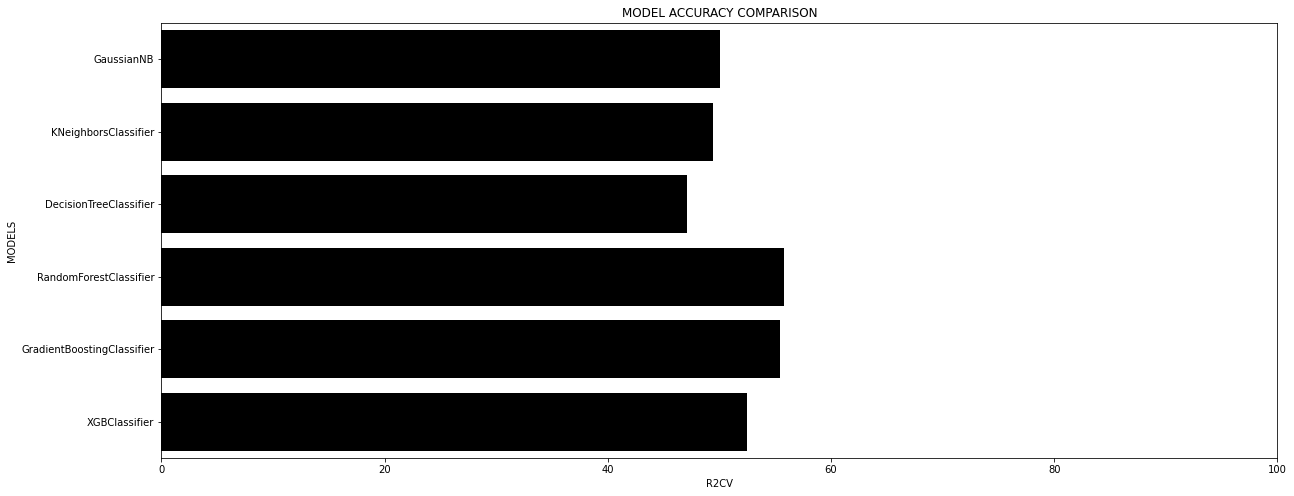

In [ ]:
r = pd.DataFrame(columns=["MODELS","R2CV"])
for model in model_m:
    name = model.__class__.__name__
    R2CV = cross_val_score(model,result_kbest_val,y1val,cv=10,verbose=False).mean()
    result = pd.DataFrame([[name,R2CV*100]],columns=["MODELS","R2CV"])
    r = r.append(result)

figure = plt.figure(figsize=(20,8))
sns.barplot(x="R2CV",y="MODELS",data=r,color="k")
plt.xlabel("R2CV")
plt.ylabel("MODELS")
plt.xlim(0,100)
plt.title("MODEL ACCURACY COMPARISON")
plt.show()

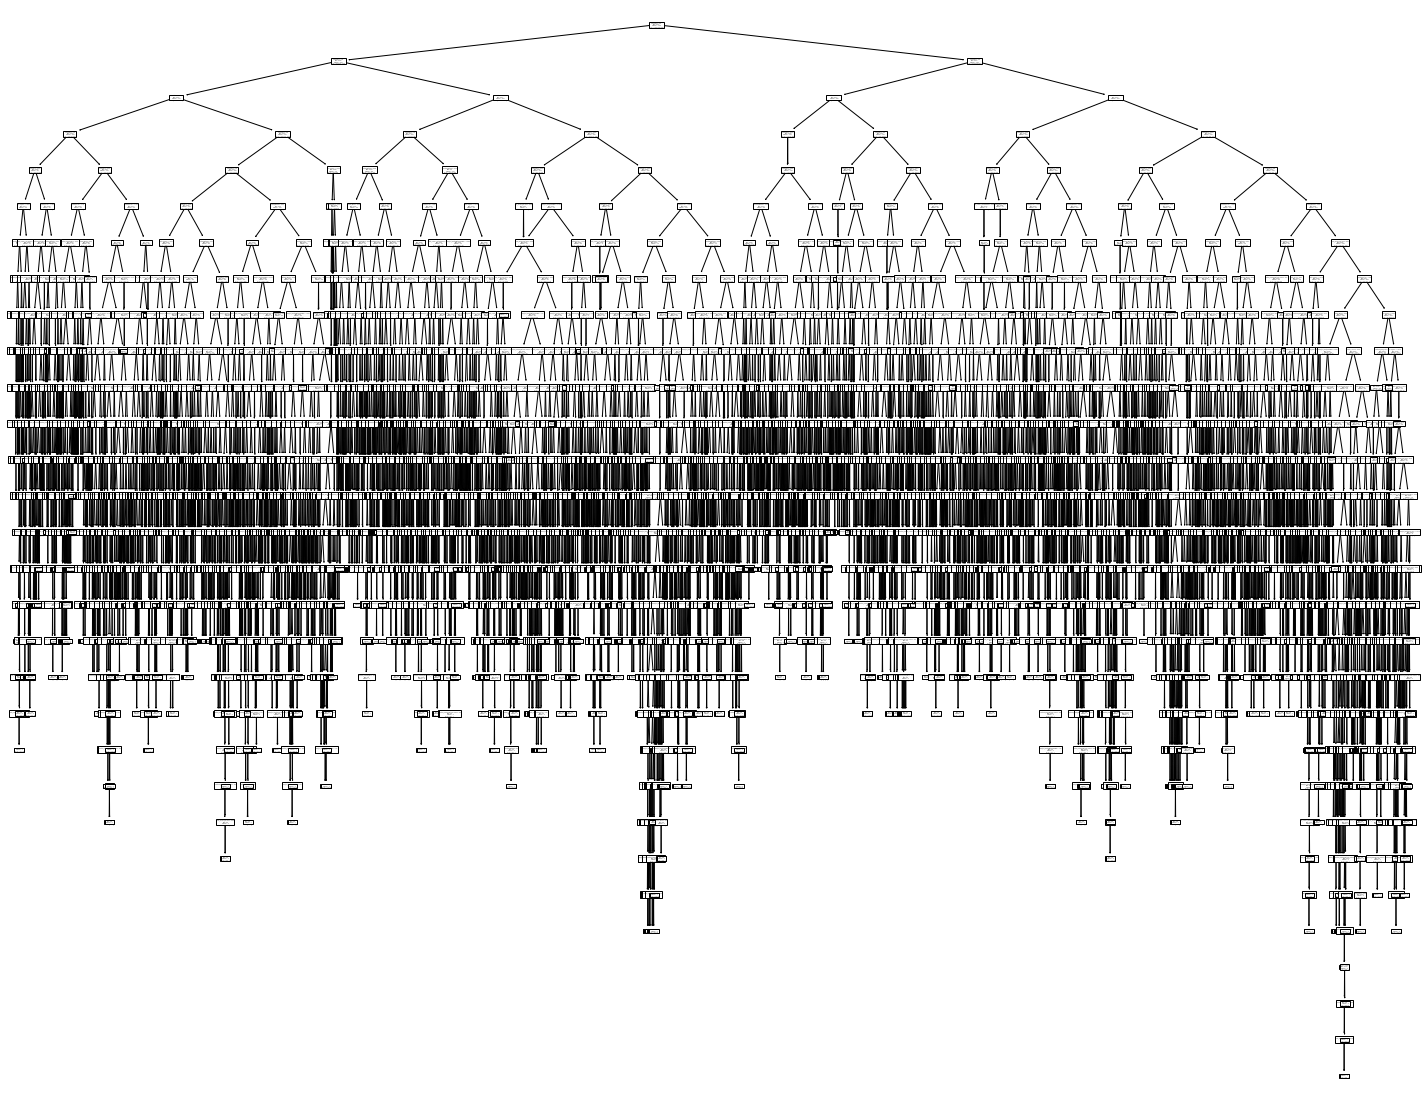

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_=tree.plot_tree(cartc_m, feature_names=list(result_kbest_20.columns))

In [ ]:
fig.savefig('my_plot.png')

#AlexNet

In [ ]:
#ALEXNET MODEL
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define the model architecture
model = Sequential()

model.add(Conv1D(filters=96, kernel_size=11, strides=4, activation='relu', input_shape=(25, 1)))
model.add(MaxPooling1D(pool_size=3, strides=2))

model.add(Conv1D(filters=256, kernel_size=5, strides=1, activation='relu', padding="same"))
model.add(MaxPooling1D(pool_size=1, strides=1))

model.add(Conv1D(filters=384, kernel_size=3, strides=1, activation='relu', padding="same"))
model.add(Conv1D(filters=384, kernel_size=3, strides=1, activation='relu', padding="same"))
model.add(Conv1D(filters=256, kernel_size=3, strides=1, activation='relu', padding="same"))
model.add(MaxPooling1D(pool_size=1, strides=1))

model.add(Flatten())

model.add(Dense(units=4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'],steps_per_execution=75)
model.summary()
# Fit the model
#history = model.fit(x=result_kbest_20, y=y_t1, epochs=100, batch_size=10, validation_data=(result_kbest_val, y_val1))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 96)             1152      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 96)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 256)            123136    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 256)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 1, 384)            295296    
                                                                 
 conv1d_3 (Conv1D)           (None, 1, 384)            4

In [ ]:
history = model.fit(x=result_kbest_20, y=y_t1, epochs=5
                    , batch_size=25, validation_data=(result_kbest_val, y_val1))

Epoch 1/5
842/842 [==============================] - 151s 179ms/step - loss: 1.0983 - accuracy: 0.3440 - val_loss: 1.0951 - val_accuracy: 0.5108
Epoch 2/5
842/842 [==============================] - 145s 172ms/step - loss: 1.0976 - accuracy: 0.3598 - val_loss: 1.0959 - val_accuracy: 0.5134
Epoch 3/5
842/842 [==============================] - 146s 173ms/step - loss: 1.0954 - accuracy: 0.3797 - val_loss: 1.1028 - val_accuracy: 0.1865
Epoch 4/5
842/842 [==============================] - 146s 173ms/step - loss: 1.0889 - accuracy: 0.4581 - val_loss: 1.0939 - val_accuracy: 0.3811
Epoch 5/5
842/842 [==============================] - 146s 173ms/step - loss: 1.0562 - accuracy: 0.4957 - val_loss: 1.0553 - val_accuracy: 0.4272


In [ ]:
history = model.fit(x=result_kbest_20, y=y_t1, epochs=10
                    , batch_size=25, validation_data=(result_kbest_val, y_val1))

Epoch 1/10
842/842 [==============================] - 336s 400ms/step - loss: 0.7679 - accuracy: 0.6115 - val_loss: 0.9054 - val_accuracy: 0.5309
Epoch 2/10
842/842 [==============================] - 339s 402ms/step - loss: 0.7536 - accuracy: 0.6184 - val_loss: 0.8838 - val_accuracy: 0.5251
Epoch 3/10
842/842 [==============================] - 334s 397ms/step - loss: 0.7388 - accuracy: 0.6264 - val_loss: 0.9552 - val_accuracy: 0.5137
Epoch 4/10
842/842 [==============================] - 342s 407ms/step - loss: 0.7297 - accuracy: 0.6285 - val_loss: 0.9397 - val_accuracy: 0.5044
Epoch 5/10
842/842 [==============================] - 336s 399ms/step - loss: 0.7233 - accuracy: 0.6380 - val_loss: 0.9256 - val_accuracy: 0.4761
Epoch 6/10
842/842 [==============================] - 335s 397ms/step - loss: 0.7134 - accuracy: 0.6467 - val_loss: 0.9889 - val_accuracy: 0.5119
Epoch 7/10
842/842 [==============================] - 341s 405ms/step - loss: 0.6940 - accuracy: 0.6583 - val_loss: 0.9262 -

In [ ]:
test_loss, test_acc = model.evaluate(result_kbest_val,y_val1)
print("Test loss: ", test_loss)
print("Test Accuracy: ",test_acc)

108/108 [==============================] - 2s 23ms/step - loss: 1.0553 - accuracy: 0.4272
Test loss:  1.055256724357605
Test Accuracy:  0.4271561801433563


In [ ]:
pred=model.predict(result_kbest_val)
pred

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


108/108 [==============================] - 5s 47ms/step


array([[4.9215424e-01, 3.9623827e-02, 4.6822202e-01],
       [4.3671170e-01, 4.0071935e-04, 5.6288755e-01],
       [4.9549374e-01, 6.8867030e-03, 4.9761957e-01],
       ...,
       [3.2380733e-01, 2.1763639e-01, 4.5855632e-01],
       [3.8853684e-01, 1.4203188e-01, 4.6943134e-01],
       [4.9914074e-01, 9.1191111e-03, 4.9174011e-01]], dtype=float32)

In [ ]:
import numpy
actual_pred = []
for ele in pred:
  actual_pred.append(numpy.argmax(ele))
pred = actual_pred

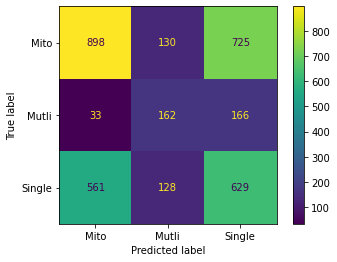

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y1val, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Mito","Mutli","Single"])
cm_display.plot()
plt.show()

In [ ]:
pip install scikit-plot

In [ ]:
from sklearn.metrics import classification_report
pred = pd.DataFrame(pred, columns =[''])
print(classification_report(y1val,pred))

              precision    recall  f1-score   support

           0       0.60      0.51      0.55      1753
           1       0.39      0.45      0.41       361
           2       0.41      0.48      0.44      1318

    accuracy                           0.49      3432
   macro avg       0.47      0.48      0.47      3432
weighted avg       0.51      0.49      0.50      3432



#AGDPM

In [ ]:
def create_model():
    import tensorflow as tf
    import numpy as np
    from tensorflow import keras
    from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Dropout
    from tensorflow.keras.models import Model

    # n_features = 25
    # Define the input shape of the genome disorder data
    input_shape = (25,)

    # Define the number of classes for the genome disorder prediction
    num_classes = 3

    # Define the input layer
    input_layer = Input(shape=input_shape) #input layer

    # Define the fully connected layers
    fc1 = Dense(100,kernel_initializer='glorot_uniform')(input_layer)
    bn1 = BatchNormalization()(fc1)
    relu1 = Activation('relu')(bn1)
    dropout1 = Dropout(0.5)(relu1)

    fc2 = Dense(100,kernel_initializer='glorot_uniform')(dropout1)
    bn2 = BatchNormalization()(fc2)
    relu2 = Activation('relu')(bn2)
    dropout2 = Dropout(0.5)(relu2)

    fc3 = Dense(100,kernel_initializer='glorot_uniform')(dropout2)
    bn3 = BatchNormalization()(fc3)
    relu3 = Activation('relu')(bn3)
    dropout3 = Dropout(0.5)(relu3)

    fc4 = Dense(100,kernel_initializer='glorot_uniform')(dropout3)
    bn4 = BatchNormalization()(fc4)
    relu4 = Activation('relu')(bn4)
    dropout4 = Dropout(0.5)(relu4)

    fc5 = Dense(100,kernel_initializer='glorot_uniform')(dropout4)
    bn5 = BatchNormalization()(fc5)
    relu5 = Activation('relu')(bn5)
    dropout5 = Dropout(0.5)(relu5)

    fc6 = Dense(100,kernel_initializer='glorot_uniform')(dropout5)
    bn6 = BatchNormalization()(fc6)
    relu6 = Activation('relu')(bn6)
    dropout6 = Dropout(0.5)(relu6)

    # fc7 = Dense(3)(dropout6)
    # Define the output layer
    output_layer = Dense(3,kernel_initializer='glorot_uniform', activation='softmax')(dropout6)


    # Define the model
    model = Model(inputs=input_layer, outputs=output_layer)

    model.summary()
    from tensorflow.keras.optimizers import Adam

    # Compile the model with appropriate loss function, optimizer, and metrics
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'],steps_per_execution=25)

    # Train the model with appropriate training data and validation data
    # validation_data=(result_kbest_val,y1_en_val)
    # model.fit(result_kbest_20, y_t1, epochs=20, batch_size=10,validation_data=(result_kbest_val,y_val1))
    return model

# Evaluate the model on the test data


# # # Make predictions on new data using the trained model
# predictions = model.predict(new_data)

In [ ]:
model = create_model()

In [ ]:
model.fit(result_kbest_20, y_t1, epochs=20, batch_size=25,validation_data=(result_kbest_val,y_val1))

In [ ]:
model.fit(result_kbest_20, y_t1, epochs=50, batch_size=25,validation_data=(result_kbest_val,y_val1))

In [ ]:
model.fit(result_kbest_20, y_t1, epochs=80, batch_size=25,validation_data=(result_kbest_val,y_val1))

NameError: ignored

In [ ]:
model.fit(result_kbest_20, y_t1, epochs=100, batch_size=25,validation_data=(result_kbest_val,y_val1))

NameError: ignored

In [ ]:
test_loss, test_acc = model.evaluate(result_kbest_val,y_val1)

In [ ]:
print("Test loss: ", test_loss)
print("Test Accuracy: ",test_acc)

NameError: ignored

In [ ]:
pred=model.predict(result_kbest_val)
pred

NameError: ignored

In [ ]:
import numpy
actual_pred = []
for ele in pred:
  actual_pred.append(numpy.argmax(ele))
pred = actual_pred

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y1val, pred)

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Mito","Mutli","Single"])
cm_display.plot()
plt.show()

In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pred = pd.DataFrame(pred, columns =[''])

NameError: ignored

In [ ]:
print(classification_report(y1val,pred))